In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

In [2]:
df = pd.read_excel(r"C:\Users\Lwandile\OneDrive - University of South Africa\New Portfolio Projects\Property24 Project\Property 24 Data.xlsx")

In [3]:
df.head()

,Source.Name,Location,Price,Bedrooms,Bathrooms,Garages,Size
0,1.xlsx,Reyno Ridge,1900000,5.0,2.0,2.0,600 m²
1,1.xlsx,Reyno Ridge,2050000,3.0,2.0,2.0,NaN
2,1.xlsx,Hoeveld Park,1280000,3.0,2.0,1.0,1 371 m²
3,1.xlsx,Reyno Ridge,960000,3.0,2.0,1.0,494 m²
4,1.xlsx,Bankenveld Estate,3170000,3.0,2.0,2.0,448 m²


In [4]:
df.dtypes

Source.Name     object
Location        object
Price            int64
Bedrooms       float64
Bathrooms      float64
Garages        float64
Size            object
dtype: object

# Cleaning Columns

In [5]:
#Remove the m² and white spaces
df["Size"] = (
    df["Size"]
    .astype(str)
    .str.replace("m²", "", regex=False)    # remove literal 'm²'
    .str.replace(" ", "", regex=False)     # remove spaces (thousands separators)
    .str.strip()                           # remove leading/trailing spaces
)

#Change data type from object to str
df["Size"] = pd.to_numeric(df["Size"], errors="coerce")  # convert to float, NaN if fails

df.head()
df['Size'].dtype

dtype('float64')

In [6]:
#Convert Price column data type from int to float
df['Price'] = df['Price'].astype(float)

df['Price'].dtype

dtype('float64')

# Handeling Missing Data

In [7]:
#Checking precentage of null rows in Size 
missing_pct = df['Size'].isnull().mean() * 100
print(f"Size column missing {missing_pct:.2f}% of rows")

Size column missing 41.14% of rows


In [8]:
#Dropping null values in Size column
df = df.dropna(subset=['Size'])

In [9]:

df['Size'].isnull().nunique()

1

In [10]:
#Checking precentage of null rows in Bedrooms, Bathrooms and Garages
missing_pct = df['Bedrooms'].isnull().mean() * 100
print(f"Bedrooms column missing {missing_pct:.2f}% of rows")

missing_pct = df['Bathrooms'].isnull().mean() * 100
print(f"Bathooms column missing {missing_pct:.2f}% of rows")

missing_pct = df['Garages'].isnull().mean() * 100
print(f"Garages column missing {missing_pct:.2f}% of rows")

Bedrooms column missing 2.44% of rows
Bathooms column missing 2.44% of rows
Garages column missing 18.36% of rows


In [11]:
#Fill missing Garages values with zero because those properties are most likey apartments and have no garages
df['Garages'] = df['Garages'].fillna(0)

In [12]:
df['Garages'].isnull().nunique()

1

In [13]:
#Filling missing values in Bedrooms with the median
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].median())

#Filling missing values in Bathrooms with the mode
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].mode())

In [14]:
df['Bedrooms'].isnull().nunique()

1

In [15]:
df['Bathrooms'].isnull().nunique()

2

In [16]:
#Dropping the remaining null values in the columns
df = df.dropna(subset=['Garages', 'Size', 'Bedrooms', 'Bathrooms'])

In [17]:
print(df.isnull().sum())
print(f"Total rows: {len(df)}")
print(f"Rows with any nulls: {df.isnull().any(axis=1).sum()}")

Source.Name    0
Location       0
Price          0
Bedrooms       0
Bathrooms      0
Garages        0
Size           0
dtype: int64
Total rows: 1121
Rows with any nulls: 0


# EDA

In [18]:
df.describe()

,Price,Bedrooms,Bathrooms,Garages,Size
count,1.121000e+03,1121.000000,1121.000000,1121.000000,1121.000000
mean,1.509275e+06,3.239964,2.122212,2.125781,895.215210
std,1.423934e+06,1.544706,1.312630,2.093627,2302.951677
min,2.000000e+05,1.000000,1.000000,0.000000,2.400000
25%,7.400000e+05,3.000000,1.000000,1.000000,225.000000
50%,1.085000e+06,3.000000,2.000000,2.000000,408.000000
75%,1.699000e+06,3.000000,2.000000,3.000000,1031.000000
max,1.900000e+07,17.000000,14.000000,28.000000,45560.000000


In [19]:
df['Location_Grouped'] = df['Location'].str.replace(r'\s+Ext.*$', '', regex=True)
df

,Source.Name,Location,Price,Bedrooms,Bathrooms,Garages,Size,Location_Grouped
0,1.xlsx,Reyno Ridge,1900000.0,5.0,2.0,2.0,600.0,Reyno Ridge
2,1.xlsx,Hoeveld Park,1280000.0,3.0,2.0,1.0,1371.0,Hoeveld Park
3,1.xlsx,Reyno Ridge,960000.0,3.0,2.0,1.0,494.0,Reyno Ridge
4,1.xlsx,Bankenveld Estate,3170000.0,3.0,2.0,2.0,448.0,Bankenveld Estate
6,1.xlsx,Model Park,1170000.0,3.0,2.0,2.0,535.0,Model Park
...,...,...,...,...,...,...,...,...
1942,Property24 (9).xlsx,Witbank Ext 20,1999000.0,4.0,3.0,3.0,501.0,Witbank
1945,Property24 (9).xlsx,Duvha Park,750000.0,3.0,2.0,0.0,285.0,Duvha Park
1946,Property24 (9).xlsx,Tasbet Park,2150000.0,3.0,2.0,7.0,1270.0,Tasbet Park
1948,Property24 (9).xlsx,Kwaguqa Ext 5,450000.0,2.0,1.0,0.0,200.0,Kwaguqa


In [20]:
df['Location_Grouped'].unique()

array(['Reyno Ridge', 'Hoeveld Park', 'Bankenveld Estate', 'Model Park',
       'Tasbet Park', 'Komdraai', 'Marelden', 'Die Heuwel', 'Del Judor',
       'Pine Ridge', 'South View', 'Witbank', 'Duvha Park', 'Kwaguqa',
       'Witbank Central', 'Clewer', 'Ben Fleur', 'Jackaroo Park',
       'Klarinet', 'Bankenveld', 'Bankenveld Golf Estate', 'Naauwpoort',
       'Klipfontein', 'Dixon AH', 'Ackerville', 'Blancheville',
       'River View', 'Zeekoewater AH', 'Hlalanikahle', 'Witbank Rural',
       'Seekoeiwater AH', 'Kendal', 'Jackaroo AH', 'Ferrobank',
       'Thushanang', 'Lynnville', 'Phola', 'Schoongezicht', 'Wilge'],
      dtype=object)

In [21]:
# create grouped location, collapsing "Ext..." and any Bankenveld variants
df["Location_Grouped"] = (
    df["Location"]
      .str.replace(r'\s+Ext.*$', '', regex=True)                   # strip " Ext..." suffixes
      .str.replace(r"(?i)bankenveld.*", "Bankenveld", regex=True)  # unify Bankenveld* into "Bankenveld"
)

df

,Source.Name,Location,Price,Bedrooms,Bathrooms,Garages,Size,Location_Grouped
0,1.xlsx,Reyno Ridge,1900000.0,5.0,2.0,2.0,600.0,Reyno Ridge
2,1.xlsx,Hoeveld Park,1280000.0,3.0,2.0,1.0,1371.0,Hoeveld Park
3,1.xlsx,Reyno Ridge,960000.0,3.0,2.0,1.0,494.0,Reyno Ridge
4,1.xlsx,Bankenveld Estate,3170000.0,3.0,2.0,2.0,448.0,Bankenveld
6,1.xlsx,Model Park,1170000.0,3.0,2.0,2.0,535.0,Model Park
...,...,...,...,...,...,...,...,...
1942,Property24 (9).xlsx,Witbank Ext 20,1999000.0,4.0,3.0,3.0,501.0,Witbank
1945,Property24 (9).xlsx,Duvha Park,750000.0,3.0,2.0,0.0,285.0,Duvha Park
1946,Property24 (9).xlsx,Tasbet Park,2150000.0,3.0,2.0,7.0,1270.0,Tasbet Park
1948,Property24 (9).xlsx,Kwaguqa Ext 5,450000.0,2.0,1.0,0.0,200.0,Kwaguqa


In [22]:
df['Location_Grouped'].unique()

array(['Reyno Ridge', 'Hoeveld Park', 'Bankenveld', 'Model Park',
       'Tasbet Park', 'Komdraai', 'Marelden', 'Die Heuwel', 'Del Judor',
       'Pine Ridge', 'South View', 'Witbank', 'Duvha Park', 'Kwaguqa',
       'Witbank Central', 'Clewer', 'Ben Fleur', 'Jackaroo Park',
       'Klarinet', 'Naauwpoort', 'Klipfontein', 'Dixon AH', 'Ackerville',
       'Blancheville', 'River View', 'Zeekoewater AH', 'Hlalanikahle',
       'Witbank Rural', 'Seekoeiwater AH', 'Kendal', 'Jackaroo AH',
       'Ferrobank', 'Thushanang', 'Lynnville', 'Phola', 'Schoongezicht',
       'Wilge'], dtype=object)

In [52]:
# Create a location score (e.g., median price by location)
location_price = df.groupby('Location_Grouped')['Price'].median()


df['Location_Score'] = df['Location_Grouped'].map(location_price)

In [53]:
df.head()

,Source.Name,Location,Price,Bedrooms,Bathrooms,Garages,Size,Location_Grouped,Location_Score
0,1.xlsx,Reyno Ridge,1900000.0,5.0,2.0,2.0,600.0,Reyno Ridge,1250000.0
2,1.xlsx,Hoeveld Park,1280000.0,3.0,2.0,1.0,1371.0,Hoeveld Park,1350000.0
3,1.xlsx,Reyno Ridge,960000.0,3.0,2.0,1.0,494.0,Reyno Ridge,1250000.0
4,1.xlsx,Bankenveld Estate,3170000.0,3.0,2.0,2.0,448.0,Bankenveld,4300000.0
6,1.xlsx,Model Park,1170000.0,3.0,2.0,2.0,535.0,Model Park,2140000.0


# Visualisations

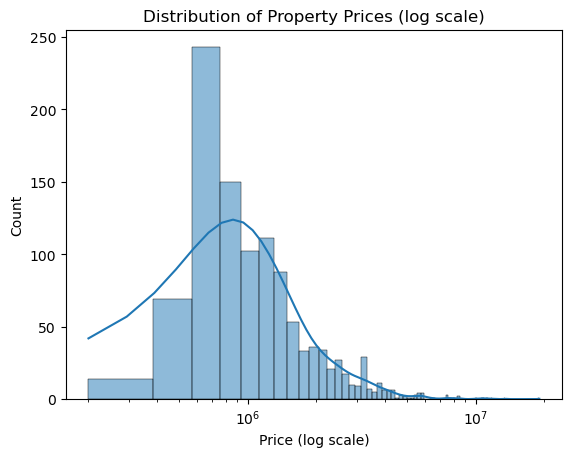

In [23]:
#Distribution of price
sns.histplot(df['Price'], kde=True)
plt.xscale('log')  # Log scale on x-axis
plt.title('Distribution of Property Prices (log scale)')
plt.xlabel('Price (log scale)')
plt.show()

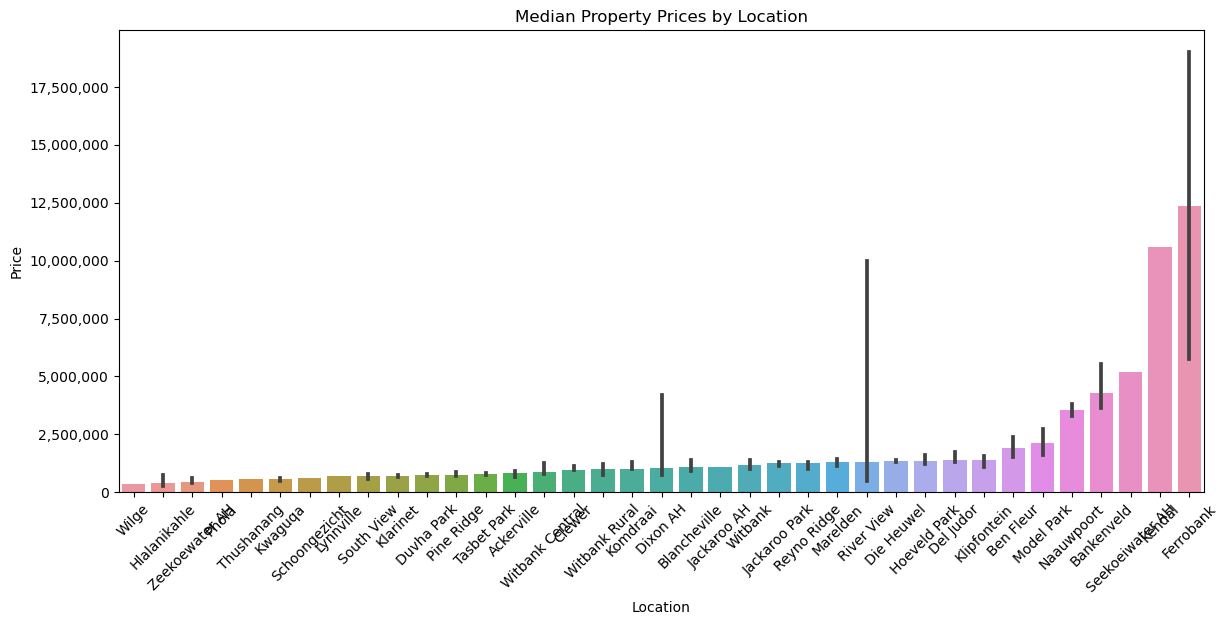

In [24]:
#Price by Location

plt.figure(figsize=(14, 6))
sns.barplot(
    x='Location_Grouped', 
    y='Price', 
    data=df, 
    estimator=np.median, 
    order=df.groupby('Location_Grouped')['Price'].median().sort_values().index
)
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.title('Median Property Prices by Location')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()


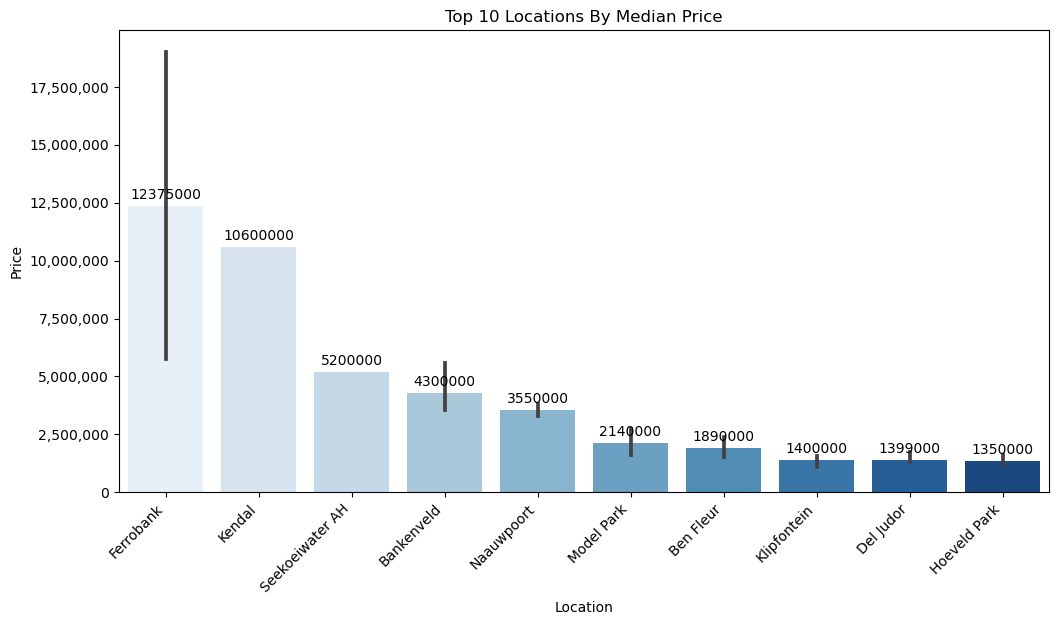

In [50]:
#Price by Location (Top 10)
median_by_location = df.groupby('Location_Grouped')['Price'].median().sort_values(ascending=False).head(10)
top10 = median_by_location.index
colours = sns.color_palette("Blues", n_colors=10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Location_Grouped',
    y='Price',
    data=df[df['Location_Grouped'].isin(top10)],
    estimator=np.median,
    order=top10,  # keeps the bars sorted by descending median
    palette = colours
)
plt.xlabel('Location')
plt.title('Top 10 Locations By Median Price')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f', padding=3)
    
plt.show()

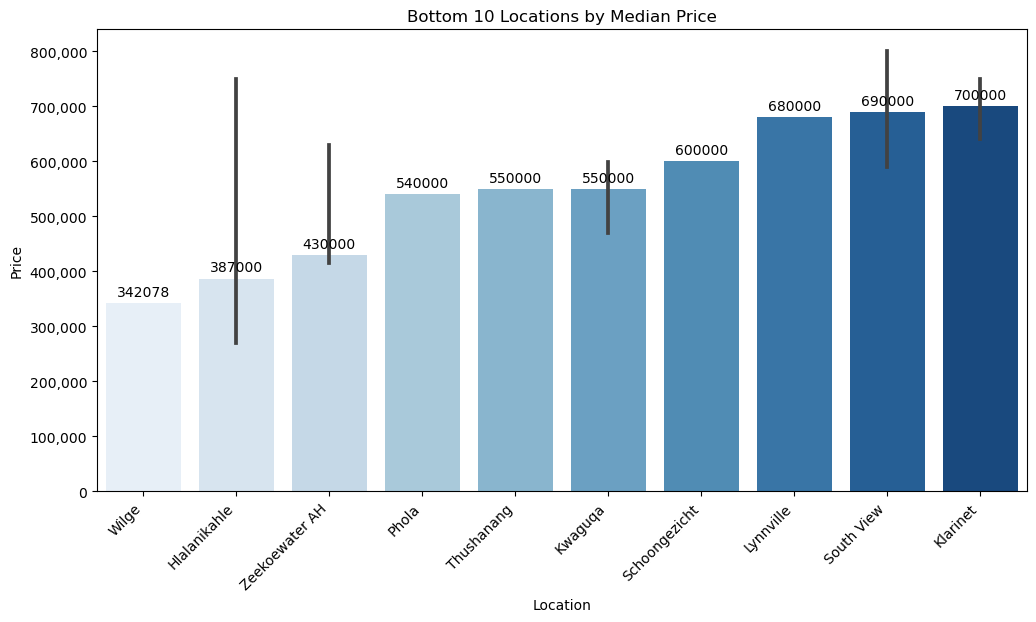

In [51]:
#Price by Location (Bottom 10)
median_by_location = df.groupby('Location_Grouped')['Price'].median().sort_values(ascending=True).head(10)
bottom10 = median_by_location.index
colours = sns.color_palette("Blues", n_colors=10)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='Location_Grouped',
    y='Price',
    data=df[df['Location_Grouped'].isin(bottom10)],
    estimator=np.median,
    order=bottom10,  # sorted ascending for lowest first
    palette = colours
)
plt.xlabel('Location')
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 10 Locations by Median Price')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.0f', padding=3)
    
plt.show()


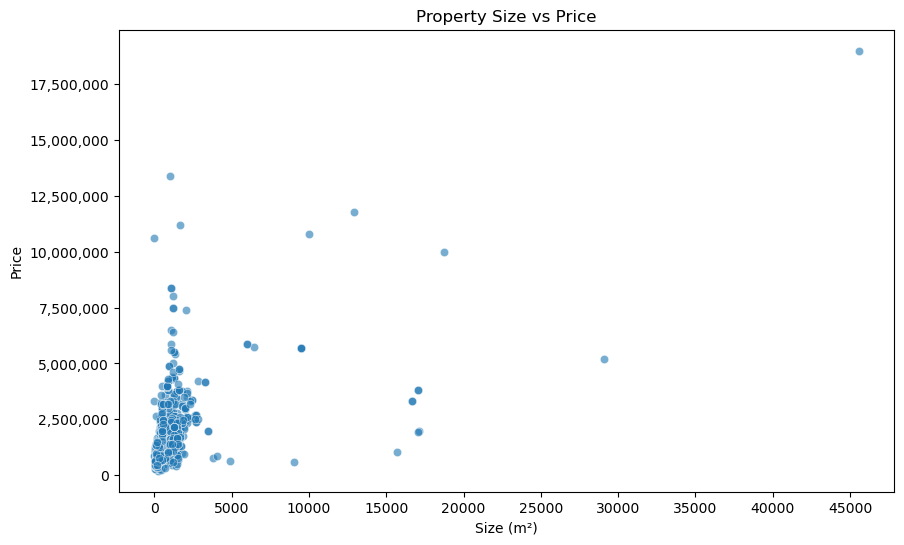

In [48]:
#Property Size vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Size', y='Price', alpha=0.6)
plt.xlabel('Size (m²)')
plt.ylabel('Price')
plt.title('Property Size vs Price')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5000))
plt.show()

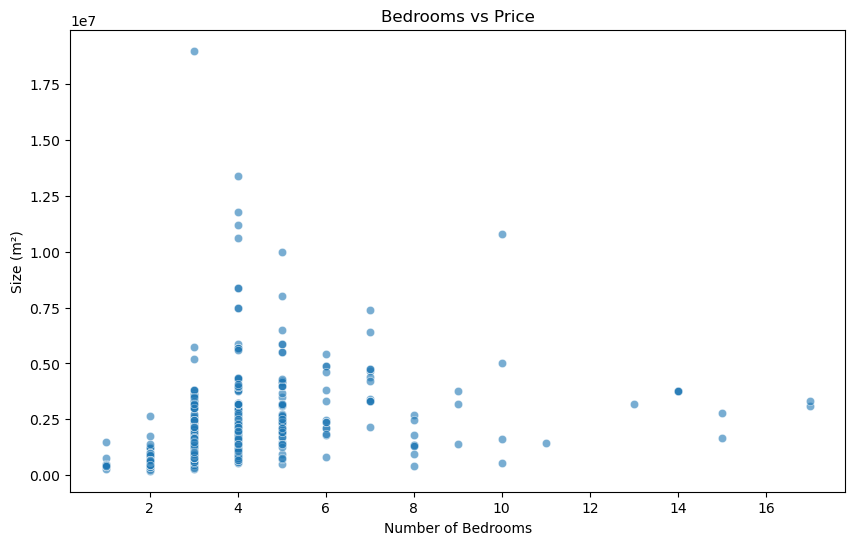

In [30]:
#Number of Bedrooms vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Bedrooms', y='Price', alpha=0.6)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Size (m²)')
plt.title('Bedrooms vs Price')
plt.show()

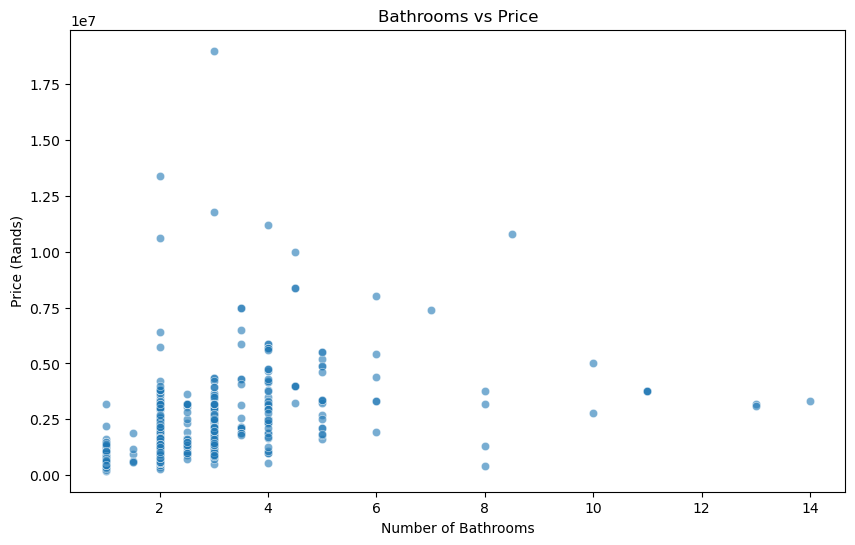

In [49]:
#Number of Bathrooms vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Bathrooms', y='Price', alpha=0.6)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (Rands)')
plt.title('Bathrooms vs Price')
plt.show()

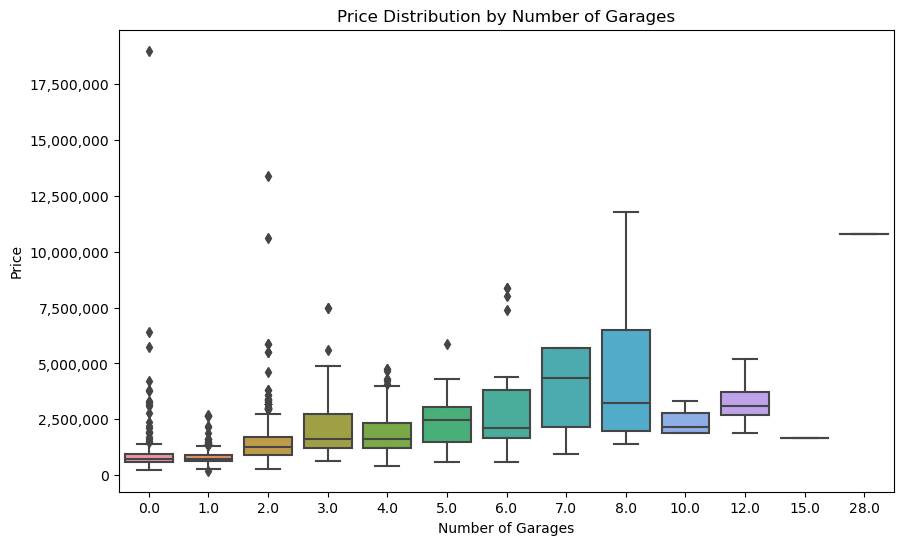

In [32]:
#Number of Garages vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Garages', y='Price')
plt.xlabel('Number of Garages')
plt.ylabel('Price')
plt.title('Price Distribution by Number of Garages')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}')) 
plt.show()


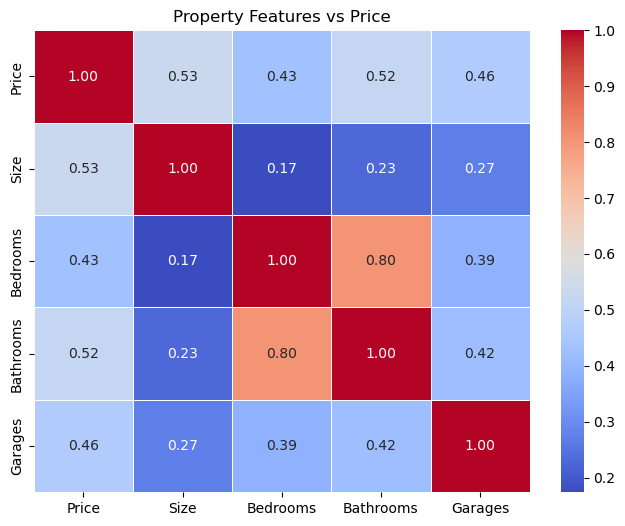

In [32]:
#Correlation heatmap of all the independent variables vs the dependent variable

numeric_df = df[['Price', 'Size', 'Bedrooms', 'Bathrooms', 'Garages']]

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Property Features vs Price')
plt.show()

# Regression Analysis

In [54]:
df_model = df[['Price', 'Bedrooms', 'Bathrooms', 'Garages', 'Size', 'Location_Score']]

In [55]:
#Train/Test Split
from sklearn.model_selection import train_test_split

X= df_model.drop('Price', axis=True)
y = df_model['Price']

X_train, X_Test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [56]:
#Train Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_Test)

In [57]:
#Evaluate Model
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print("Intercept:", model.intercept_)

#Feature Importances
coeffiecients = pd.Series(model.coef_, index=X.columns)
print(coeffiecients.sort_values(ascending=False))

R2 Score: 0.5554087416118505
Mean Absolute Error: 469338.7329134611
Intercept: -607692.6798116015
Bathrooms         212951.380390
Garages           109556.517805
Bedrooms           89370.286877
Size                 128.172825
Location_Score         0.793500
dtype: float64


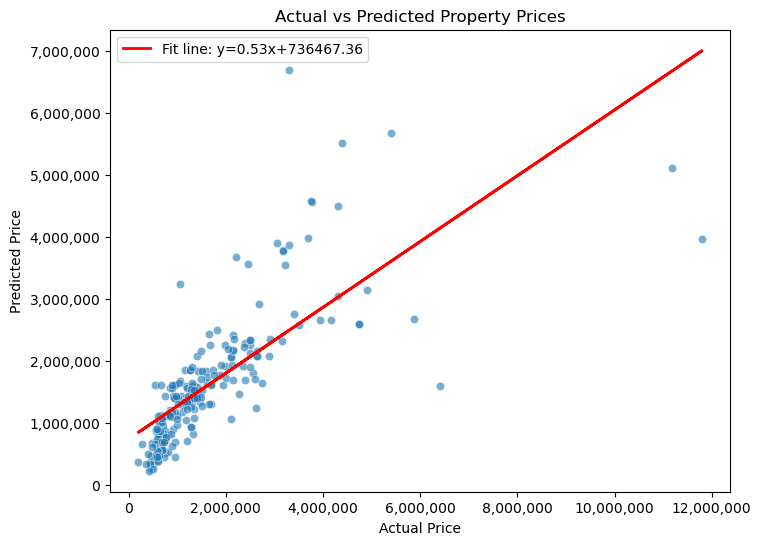

In [58]:
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Plot regression line (best fit line)
# Fit a line to the actual vs predicted points
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='red', linewidth=2, label=f'Fit line: y={m:.2f}x+{b:.2f}')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Property Prices')
plt.legend()

# Format y-axis and x-axis with thousand separators
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()